In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as io
import cv2
import torch
import os
import sys
from utils.utils_funcitons import *
device= "cuda" if torch.cuda.is_available() else "cpu"
from ultralytics import YOLO

dataset_path = r'.\dataset\Task1_Image_detection'

train_images_path = os.path.join(dataset_path, rf'train\images')
train_labels_path = os.path.join(dataset_path, rf'train\labels')
valid_images_path = os.path.join(dataset_path, rf'valid\images')
valid_labels_path = os.path.join(dataset_path, rf'valid\labels')
test_images_path = os.path.join(dataset_path, rf'test\images')
test_labels_path = os.path.join(dataset_path, rf'test\labels')

## 1. Dataset exploration

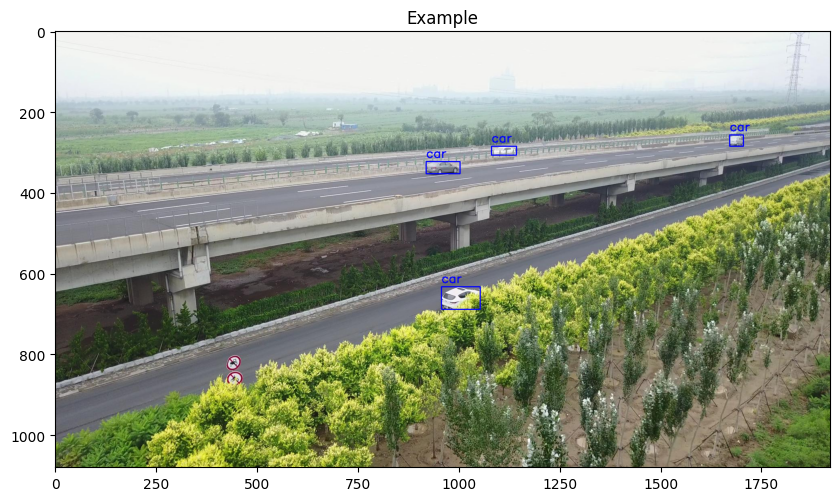

In [3]:
random_idx = np.random.randint(1000)
paths = os.listdir(train_images_path)
paths = [path.split(sep='.')[0] for path in paths] #Remove extension. Image and annotations have the same filename

random_image_path = os.path.join(train_images_path, f'{paths[random_idx]}.jpg')
random_label_path = os.path.join(train_labels_path, f'{paths[random_idx]}.txt')

random_image = read_image_file(random_image_path)
random_labels = read_labels_file(random_label_path)
#print(random_labels)
#display_image_w_annotations(random_image, random_labels, max_annot=5)
display_image_w_annotations_YOLO(random_image, random_labels, max_annot=1000)

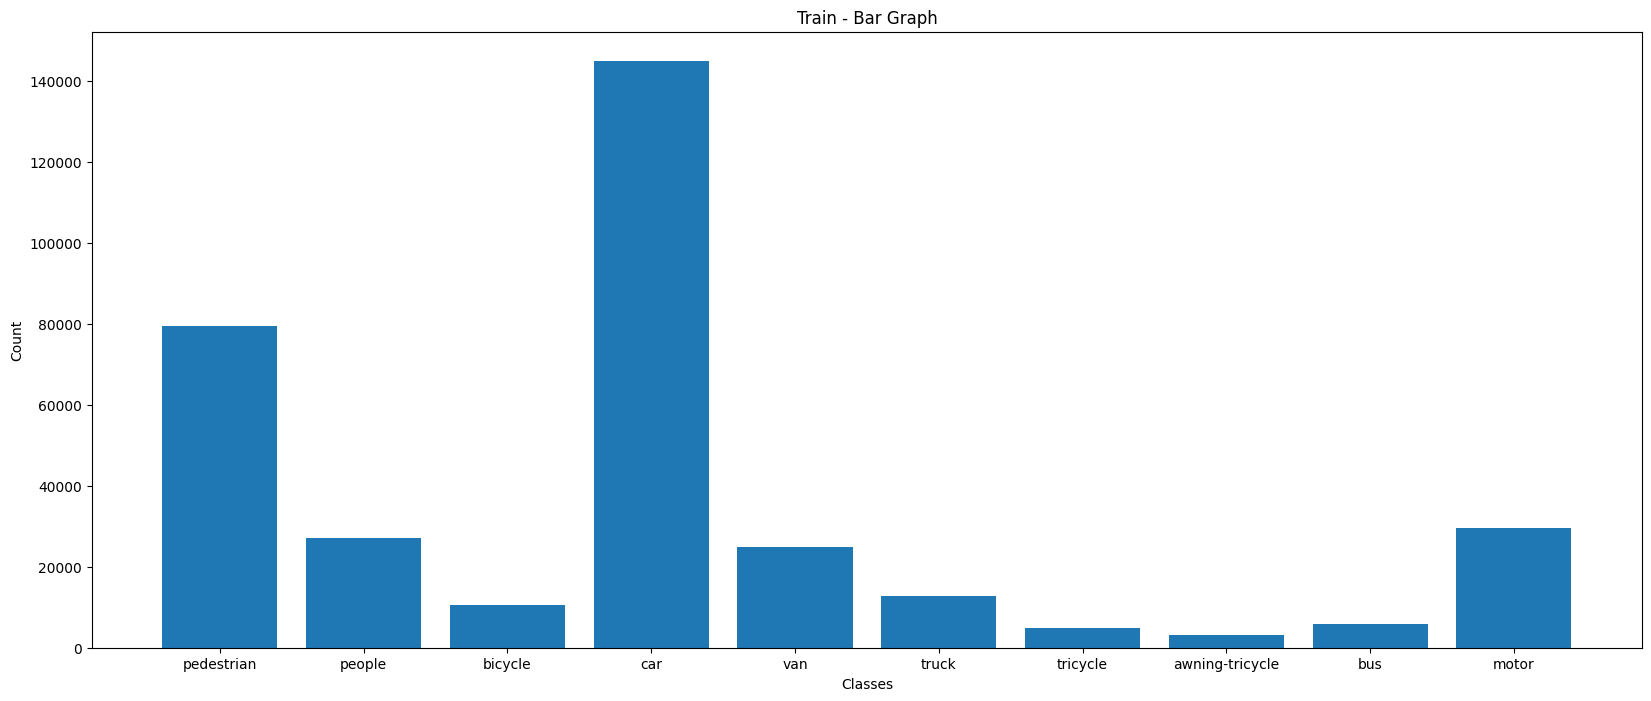

In [3]:
def count_labels(label_path):
    classes = ['pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor']
    classes_count = {'pedestrian':0, 'people':0, 'bicycle':0, 'car':0, 'van':0, 'truck':0, 'tricycle':0, 'awning-tricycle':0, 'bus':0, 'motor':0}
    label_files = os.listdir(label_path)
    for label_file in label_files:
        with open(os.path.join(label_path, label_file), 'r') as f:
            labels = [label.strip() for label in f.readlines()]
            for annot in (labels):
                object_category = int(annot.split(sep=' ')[0])
                classes_count[classes[object_category]] += 1
    
    return classes_count

result = count_labels(train_labels_path)

classes = list(result.keys())
height = list(result.values())

plt.figure(figsize=(20,8))
plt.bar(classes, height)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Train - Bar Graph')
plt.show()

## 2. Train YOLOv8 on VisDrone Dataset

In [2]:
from ultralytics import YOLO

model = YOLO(r'models\yolov8n.pt')  # load a pretrained model (recommended for training)
# Train the model
train = model.train(model=r'models\yolov8n.pt', data=r'dataset\Task1_Image_detection\data.yaml', epochs=100, batch=8, device=device, imgsz=800, augment=True)

Ultralytics YOLOv8.1.0 🚀 Python-3.10.0 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine\trainer: task=detect, mode=train, model=models\yolov8n.pt, data=dataset\Task1_Image_detection\data.yaml, epochs=100, time=None, patience=50, batch=8, imgsz=800, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

100%|██████████| 6.23M/6.23M [00:00<00:00, 8.03MB/s]


AMP: checks passed ✅


train: Scanning D:\Nicolas\Proyectos-IA\CV_projects\VisDrone\dataset\Task1_Image_detection\train\labels.cache... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:00<?, ?it/s]

train: WARNING ⚠️ D:\Nicolas\Proyectos-IA\CV_projects\VisDrone\dataset\Task1_Image_detection\train\images\0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ D:\Nicolas\Proyectos-IA\CV_projects\VisDrone\dataset\Task1_Image_detection\train\images\0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ D:\Nicolas\Proyectos-IA\CV_projects\VisDrone\dataset\Task1_Image_detection\train\images\9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ D:\Nicolas\Proyectos-IA\CV_projects\VisDrone\dataset\Task1_Image_detection\train\images\9999987_00000_d_0000049.jpg: 1 duplicate labels removed



val: Scanning D:\Nicolas\Proyectos-IA\CV_projects\VisDrone\dataset\Task1_Image_detection\valid\labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.92G      1.743      2.337      1.071        728        800: 100%|██████████| 809/809 [02:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:06<00:00,  5.47it/s]

                   all        548      38759      0.217      0.194      0.148      0.079



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.46G       1.66      1.621       1.03        679        800: 100%|██████████| 809/809 [01:52<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:05<00:00,  6.14it/s]

                   all        548      38759      0.284      0.237      0.199       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.62G      1.673      1.548       1.03        668        800: 100%|██████████| 809/809 [01:49<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:05<00:00,  6.42it/s]

                   all        548      38759      0.274      0.259       0.21      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.81G      1.643      1.483      1.024        511        800: 100%|██████████| 809/809 [01:49<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:05<00:00,  6.74it/s]

                   all        548      38759      0.319      0.274      0.241      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.32G      1.614      1.417      1.015        800        800: 100%|██████████| 809/809 [01:50<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:05<00:00,  6.89it/s]

                   all        548      38759      0.367      0.266      0.246      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.19G      1.589       1.36      1.004        338        800: 100%|██████████| 809/809 [01:48<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:05<00:00,  6.99it/s]


                   all        548      38759      0.335      0.281      0.255      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.84G      1.562       1.32     0.9984        346        800: 100%|██████████| 809/809 [01:44<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:04<00:00,  7.16it/s]

                   all        548      38759      0.354      0.294      0.271      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.05G      1.548       1.28       0.99        458        800: 100%|██████████| 809/809 [01:47<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:04<00:00,  7.06it/s]

                   all        548      38759      0.379      0.303      0.282      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.19G      1.537       1.26     0.9896        651        800: 100%|██████████| 809/809 [01:47<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:04<00:00,  7.39it/s]


                   all        548      38759      0.395      0.297      0.286      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.64G      1.521      1.232      0.984        449        800: 100%|██████████| 809/809 [01:47<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:04<00:00,  7.42it/s]

                   all        548      38759      0.394      0.295      0.287      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.72G      1.507      1.212     0.9828        786        800: 100%|██████████| 809/809 [01:46<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:04<00:00,  7.29it/s]

                   all        548      38759      0.399       0.31      0.296       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       5.5G      1.488      1.189     0.9766        667        800: 100%|██████████| 809/809 [01:45<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:04<00:00,  7.66it/s]


                   all        548      38759      0.412      0.307      0.301      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.68G      1.491      1.177     0.9767        285        800: 100%|██████████| 809/809 [01:45<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:04<00:00,  7.42it/s]


                   all        548      38759      0.417      0.314      0.306      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.05G       1.48      1.167     0.9722        874        800: 100%|██████████| 809/809 [01:44<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:04<00:00,  7.57it/s]


                   all        548      38759      0.431      0.312      0.307      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       7.7G      1.499      1.163     0.9725        858        800:  46%|████▌     | 369/809 [00:48<00:57,  7.67it/s]


KeyboardInterrupt: 

In [4]:
metrics = model.val(data=r'dataset\Task1_Image_detection\data.yaml', batch=8, device=device, imgsz=736)

WARNING ⚠️ imgsz=[720] must be multiple of max stride 32, updating to [736]
Ultralytics YOLOv8.1.0 🚀 Python-3.10.0 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)


val: Scanning D:\Nicolas\Proyectos-IA\CV_projects\VisDrone\dataset\Task1_Image_detection\valid\labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:14<00:00,  4.61it/s]


                   all        548      38759      0.526      0.407       0.42       0.25
            pedestrian        548       8844      0.538       0.44      0.472      0.215
                people        548       5125      0.599        0.3      0.364      0.142
               bicycle        548       1287      0.448      0.128      0.164     0.0701
                   car        548      14064      0.706      0.808      0.814      0.574
                   van        548       1975      0.564      0.428      0.459      0.321
                 truck        548        750      0.487      0.399      0.387      0.259
              tricycle        548       1045      0.363      0.345      0.286      0.159
       awning-tricycle        548        532      0.333      0.195      0.177       0.11
                   bus        548        251      0.679      0.546      0.589       0.43
                 motor        548       4886      0.544      0.478      0.486      0.215
Speed: 0.2ms preproce

In [7]:
model.predict(r'.\dataset\Task1_Image_detection\test\images\0000006_01275_d_0000004.jpg', imgsz=736, save=True)


image 1/1 d:\Nicolas\Proyectos-IA\CV_projects\VisDrone\dataset\Task1_Image_detection\test\images\0000006_01275_d_0000004.jpg: 416x736 1 pedestrian, 15 cars, 5 trucks, 9 motors, 161.5ms
Speed: 5.0ms preprocess, 161.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 736)
Results saved to runs\detect\predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'pedestrian', 1: 'people', 2: 'bicycle', 3: 'car', 4: 'van', 5: 'truck', 6: 'tricycle', 7: 'awning-tricycle', 8: 'bus', 9: 'motor'}
 obb: None
 orig_img: array([[[ 62, 114, 107],
         [ 55, 107, 100],
         [ 55, 106,  99],
         ...,
         [ 88,  85,  81],
         [ 86,  83,  79],
         [ 85,  82,  78]],
 
        [[ 64, 116, 109],
         [ 62, 114, 107],
         [ 57, 108, 101],
         ...,
         [ 89,  86,  82],
         [ 87,  84,  80],
         [ 86,  83,  79]],
 
        [[ 57, 109, 102],
         [ 63, 115, 108],
         [ 57, 108, 101],
         ...,
         [ 89,  86,  82],
         [ 88,  85,  81],
         [ 87,  84,  80]],
 
        ...,
 
        [[ 93, 116, 124],
         [ 84, 107, 115],
         [100, 123, 131],
         ...,
         [120, 107,  93],
         [120, 107,  93],
         [120, 10

## 3. Test YOLOv8 on VisDrone Dataset

In [2]:
model_s = YOLO(r'D:\Nicolas\Proyectos-IA\CV_projects\VisDrone\runs\detect\yolov8s\train_yolov8s\weights\best.pt')  # load a pretrained model
model_n = YOLO(r'D:\Nicolas\Proyectos-IA\CV_projects\VisDrone\runs\detect\yolov8n\train\weights\best.pt')

(249, 416) (331, 459)


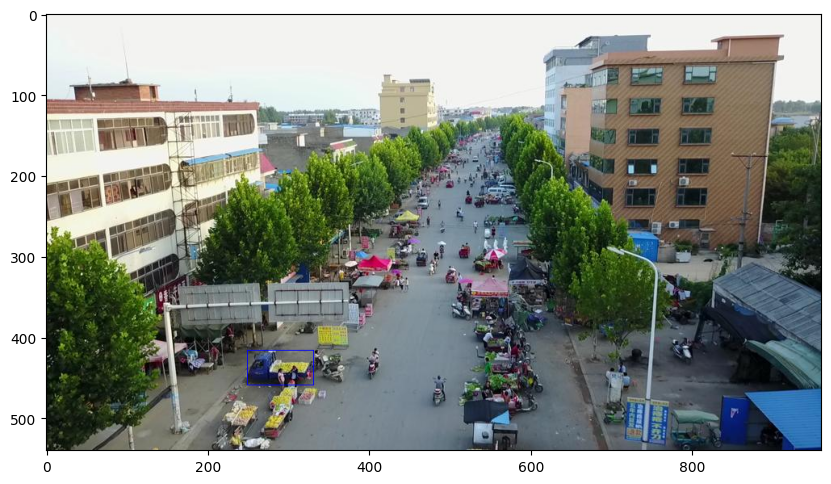

SystemExit: 

In [4]:
# choose 5 images to predict
test_images = []
predicted_images = []
predicted_boxes = []
for idx in range(2):
    random_idx = np.random.randint(1600)
    paths = os.listdir(test_images_path)
    paths = [path.split(sep='.')[0] for path in paths] #Remove extension. Image and annotations have the same filename

    random_image_path = os.path.join(test_images_path, f'{paths[random_idx]}.jpg')
    random_label_path = os.path.join(test_labels_path, f'{paths[random_idx]}.txt')

    random_image = read_image_file(random_image_path)
    random_labels = read_labels_file(random_label_path)
    test_images.append(random_image)

    result_boxes = predict(model_s, random_image, plot=False, objects=['all'])
    plot_boxes(test_images[0], result_boxes[0])
    #predicted_images.append(results_images)
    #predicted_boxes.append(result_boxes)

for i, image in enumerate(predicted_images):
    plt.figure(figsize=(10,10))
    plt.imshow(image[0])
    plt.show()

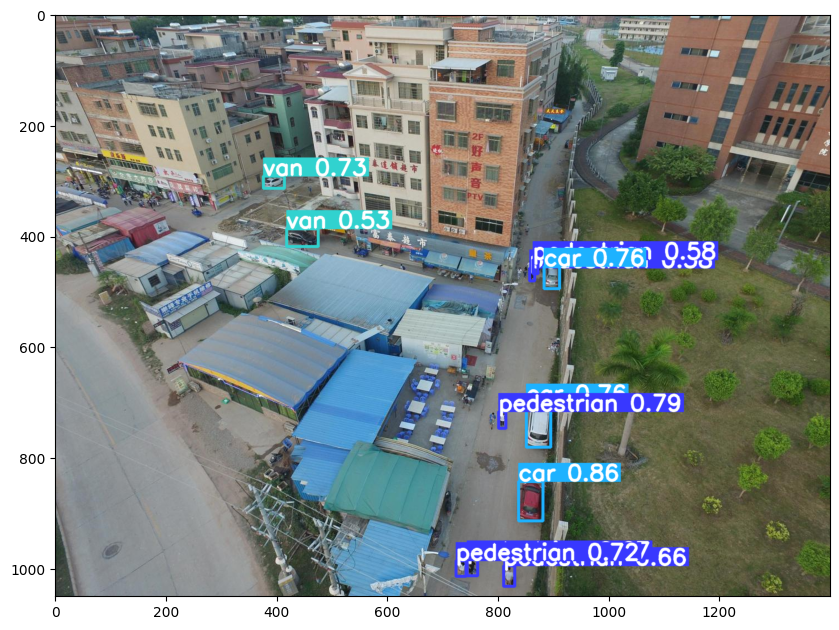

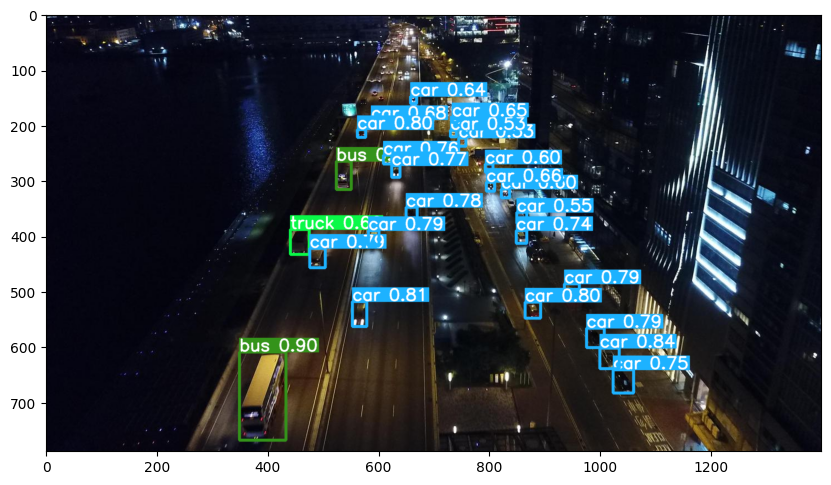

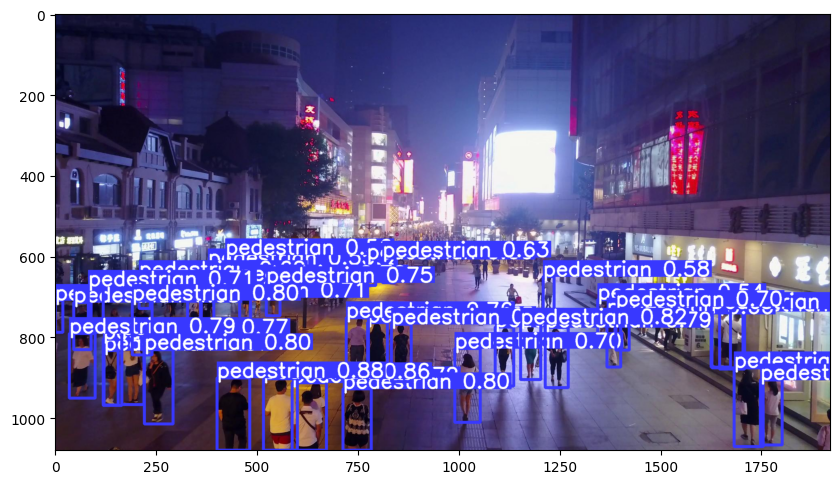

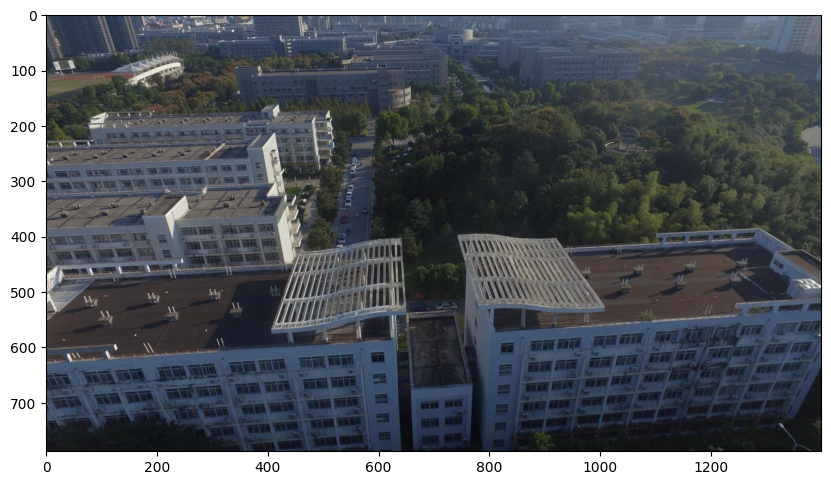

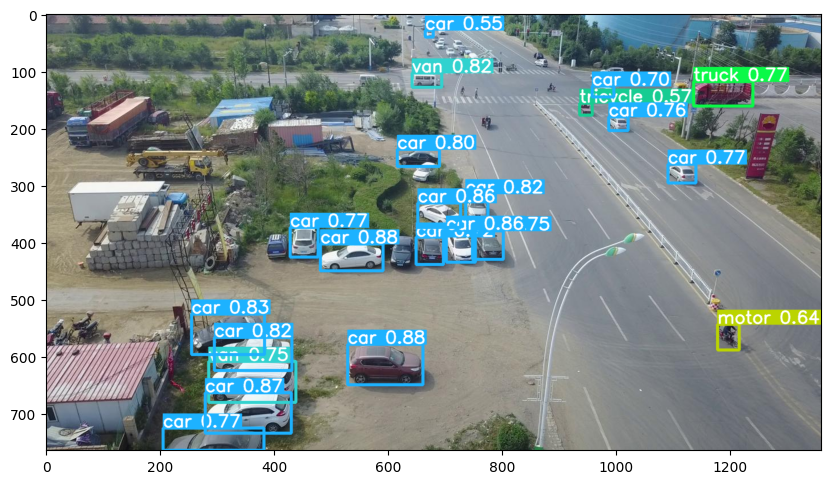

In [7]:
# choose 5 images to predict
test_images = []
predicted_images = []
predicted_boxes = []
for idx in range(5):
    random_idx = np.random.randint(1600)
    paths = os.listdir(test_images_path)
    paths = [path.split(sep='.')[0] for path in paths] #Remove extension. Image and annotations have the same filename

    random_image_path = os.path.join(test_images_path, f'{paths[random_idx]}.jpg')
    random_label_path = os.path.join(test_labels_path, f'{paths[random_idx]}.txt')

    random_image = read_image_file(random_image_path)
    random_labels = read_labels_file(random_label_path)
    test_images.append(random_image)

    result_boxes, results_images = predict(model_s, random_image, plot=True, objects=['all'])
    predicted_images.append(results_images)
    predicted_boxes.append(result_boxes)

for i, image in enumerate(predicted_images):
    plt.figure(figsize=(10,10))
    plt.imshow(image[0])
    plt.show()
    